In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 상관분석
- 연속형 변수 사이의 선형관계에 대해 분석하는 방법
    - 시각화: 산점도
    - 통계분석: 상관분석
        - 변수관계 : 독립관계(선형고나계에서 독립), 양의 상관관계,음의 상관관계
        - 상관관계 VS 인과관계 : 상관관계를 인과관계로 해석하면 안된다.
- 상관계수(Correaltion Coefficient)
    - 변수 사이에 선형 관계 정더를 나타내는 계수
    - 단위가 변하더라도 상관계수 값에는 영향을 주지 않음
    - 특이값에 영향을 받을 수 있기 때문에 상고나계수만 고려하기 보다 산점도를 함께 봐야함
    - 값에 대한 해석
        - 0: 상관관계 없음(독립)
        - ~0.5: 약한 상관관계
        - ~0.7: 상관 관계가 있음
        - ~0.9: 강한 상관관계
        - 1.0 : 매우 강한 상관관계

- 상관관계 수식
    - x와y가 함께 변하는 정도 / x 와 y 가 각각 변하는 정도
    - x 와 y 의 공분산 / x와 y의 표준편차 곱(공분산에 대한 표준화)
        - 공분산: 두 변수간의 선형 관계 방향을 나타내는 통계 값
            - 양수이면 두 변수가 양의 관계, 음수이면 음의 관계
            - 측정단위에 의해 영향을 받기 때문에 방향은 알 수 있지만 강도는 알 수 없음
- 함수
    - df.corr() : 데이터프레임의 모든 변수 간의 상관관계
    - df.col1.corr(df.col2) : 두 개의 컬럼 간의 상관관계
    - df1.corrwith(df2.col) : 다른 데이터프레임의 컬럼 또는 하나의 변수와 나머지 변수 간의 상관관계
    - np.corrcoef() : 두 개의 컬럼 간의 상관관계

In [16]:
# 데이터프레임 생성
data=[[1,2,3,4,5],
      [10,20,30,40,50],
      [0,0,0,0,0],
      [-10,-20,-30,-40,-50]]
df1= pd.DataFrame(data)
df1=df1.T

In [17]:
df1

,0,1,2,3
0,1,10,0,-10
1,2,20,0,-20
2,3,30,0,-30
3,4,40,0,-40
4,5,50,0,-50


In [18]:
df1.columns = list('ABCD')

In [19]:
df1

,A,B,C,D
0,1,10,0,-10
1,2,20,0,-20
2,3,30,0,-30
3,4,40,0,-40
4,5,50,0,-50


In [20]:
# 컬럼 사이의 상관계수 구하기
# 결과해석
# C가 결측이 나는 이유 : C의 모든 값이 동일해서 분산이 0  분모에 0이 들어감.
df1.corr()

,A,B,C,D
A,1.0,1.0,NaN,-1.0
B,1.0,1.0,NaN,-1.0
C,NaN,NaN,NaN,NaN
D,-1.0,-1.0,NaN,1.0


In [21]:
# 컬럼 c의 값을 모두 3으로 변경
df1['C']=3

In [22]:
df1.corr()

,A,B,C,D
A,1.0,1.0,NaN,-1.0
B,1.0,1.0,NaN,-1.0
C,NaN,NaN,NaN,NaN
D,-1.0,-1.0,NaN,1.0


In [23]:
# 컬럼 C의 값을 1,2,3,4,5 로 변경
df1['C']=[1,2,3,4,5]

In [24]:
df1.corr()

,A,B,C,D
A,1.0,1.0,1.0,-1.0
B,1.0,1.0,1.0,-1.0
C,1.0,1.0,1.0,-1.0
D,-1.0,-1.0,-1.0,1.0


In [25]:
# 특정 컬럼들 간의 상관분석
df1[['A','C']].corr()

,A,C
A,1.0,1.0
C,1.0,1.0


In [28]:
data2={'X':[1,3,5,7,9],
      'Y':[-3,-4,-7,-9,-10]}
df2=pd.DataFrame(data2)

In [29]:
df2

,X,Y
0,1,-3
1,3,-4
2,5,-7
3,7,-9
4,9,-10


In [30]:
# 다른 데이터 프레임과의 상관관계
df1.corrwith(df2['X'])

A    1.0
B    1.0
C    1.0
D   -1.0
dtype: float64

In [33]:
np.corrcoef(df1['A'],df2['X'])

array([[1., 1.],
       [1., 1.]])

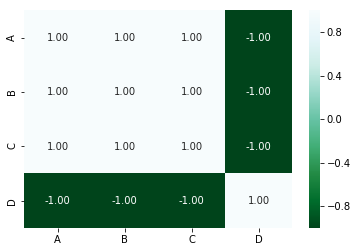

In [37]:
# ㄱ상관계수 시각화
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap='BuGn_r',fmt='.2f')

# 상관계수 활용 사례
- 데이터 파일: ch3-1(유동인구수)
- 데이터 설명: 2013년 전국 주요지점별 유동인구 수 현황의 일부
- 남자 20대 vs 여자20대, 남자 10대 vs 여자 50대의 상관계수 구하여 비교

In [44]:
data=pd.read_csv('ch3-1(유동인구수).csv',encoding='cp949',engine='python')

In [45]:
data.head()

,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대
0,2010-06-21,12시~13시까지,343099,417482,대전광역시 서구 월평동,2,24,68,50,31,4,37,64,44,26
1,2010-06-21,19시~20시까지,343099,417482,대전광역시 서구 월평동,19,44,28,33,21,14,56,49,43,18
2,2010-06-20,12시~13시까지,343099,417482,대전광역시 서구 월평동,13,33,34,61,55,13,32,29,28,12
3,2010-06-20,19시~20시까지,343099,417482,대전광역시 서구 월평동,23,33,32,547,129,12,39,13,46,4
4,2010-06-21,12시~13시까지,343121,417343,대전광역시 서구 월평동,0,9,27,21,6,5,24,20,10,6


In [58]:
# 상관관계 분석(남자20대 vs 여자 20대)
m20_f20=data[['남자20대','여자20대']].corr()

In [ ]:
# 결과 해석
# 20대 남자 유동인구와 20대 유동인구가 양의 강한 상관관계가 있다.
# 20대 유동인구는 성별에 따른 차이가 없다.
# 두개의 컬럼은 중복 속성으로 고려할 수 있는 여지를 둘 수 있다.

In [59]:
# 상관계수 분석(남자10대 vs 여자50대)
m10_f50=data[['남자10대','여자50대']].corr()

In [ ]:
# 결과해석
# 약한 양의 상관관계를 가지고 있다.
# 서로 독립에 가깝다.
# 중복속성으로 고려하기 어렵다.

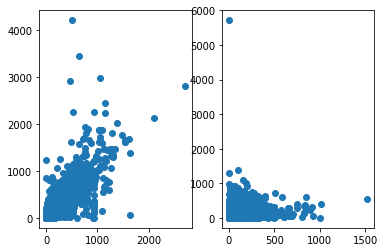

In [64]:
# 시각화
plt.subplot(1,2,1)
plt.scatter(data['남자20대'],data['여자20대'])
plt.subplot(1,2,2)
plt.scatter(data['남자10대'],data['여자50대'])

# 상관계수가 1인 변수만 추출하기

In [67]:
data=[[1,2,3,4,5],
     [10,20,30,40,50],
     [1,3,5,7,9],
     [-1,-4,-6,-8,-10],
     [10,15,20,25,30],
     [-10,-11,-15,-17,-19]]
df=pd.DataFrame(data).T
df.columns=list('ABCDEF')

In [68]:
df

,A,B,C,D,E,F
0,1,10,1,-1,10,-10
1,2,20,3,-4,15,-11
2,3,30,5,-6,20,-15
3,4,40,7,-8,25,-17
4,5,50,9,-10,30,-19


In [69]:
# 상관계수 분석
df.corr()

,A,B,C,D,E,F
A,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
B,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
C,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
D,-0.995893,-0.995893,-0.995893,1.000000,-0.995893,0.974901
E,1.000000,1.000000,1.000000,-0.995893,1.000000,-0.986394
F,-0.986394,-0.986394,-0.986394,0.974901,-0.986394,1.000000


In [71]:
# 한쪽 값만 추출
# np.triu
# np.tril
np.tril(df.corr())

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.99589321, -0.99589321, -0.99589321,  1.        ,  0.        ,
         0.        ],
       [ 1.        ,  1.        ,  1.        , -0.99589321,  1.        ,
         0.        ],
       [-0.98639392, -0.98639392, -0.98639392,  0.97490102, -0.98639392,
         1.        ]])

In [77]:
single_tri=pd.DataFrame(np.triu(df.corr()),columns=df.columns)

In [78]:
single_tri

,A,B,C,D,E,F
0,1.0,1.0,1.0,-0.995893,1.000000,-0.986394
1,0.0,1.0,1.0,-0.995893,1.000000,-0.986394
2,0.0,0.0,1.0,-0.995893,1.000000,-0.986394
3,0.0,0.0,0.0,1.000000,-0.995893,0.974901
4,0.0,0.0,0.0,0.000000,1.000000,-0.986394
5,0.0,0.0,0.0,0.000000,0.000000,1.000000


In [103]:
tmp=[]
tmp1=[]
for i in range(6):
    for j in range(6):
        if i != j:
            if single_tri.values[i][j] == 1:
                tmp.append(single_tri.columns[i])
                tmp1.append(single_tri.columns[j])
tmp,tmp1

(['A', 'A', 'A', 'B', 'B', 'C'], ['B', 'C', 'E', 'C', 'E', 'E'])

In [122]:
# a,b,c,d,e 를 숫자로 변경해서 넣으면 될껄...??
for x in tmp:
    for y in tmp:
        df[x][y]

KeyError: 'A'

{'A:B', 'A:C', 'A:E', 'B:B', 'B:C', 'B:E', 'C:B', 'C:C', 'C:E'}